<a href="https://colab.research.google.com/github/WinningHabits/lottery/blob/main/06_Optimization_and_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
!pip install deap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00


In [4]:
# Assuming data is stored in the same GitHub repository and format as before.
import pandas as pd

url = 'https://raw.githubusercontent.com/WinningHabits/lottery_dataset/main/lottery-toto_upto_08.23_revised_1.xlsx'
data = pd.read_excel(url)


In [6]:
def monte_carlo_simulation(data, num_simulations=1000):
    outcomes = []
    possible_numbers = list(range(1, 50))  # Assuming lottery numbers range from 1 to 49.

    for _ in range(num_simulations):
        draw = random.sample(possible_numbers, 7)  # Randomly drawing 7 numbers.
        outcomes.append(draw)

    # Convert outcomes to a DataFrame for easier analysis.
    outcomes_df = pd.DataFrame(outcomes, columns=[f"Draw number {i+1}" for i in range(7)])
    return outcomes_df

simulated_outcomes = monte_carlo_simulation(data)


In [8]:
from deap import base, creator, tools

# Create fitness and individual classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)


In [10]:
from deap import algorithms


In [11]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 1, 49)  # Numbers between 1 and 49.
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=7)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation function:
def evalOneMax(individual):
    # For simplicity, let's return the sum of the individual's numbers.
    # In a more sophisticated approach, you'd define a fitness function based on historical data.
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=100)
NGEN=40
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

top10 = tools.selBest(population, k=10)  # Get the top 10 individuals.


In [14]:
print(number_of_simulations)


10000


In [15]:
print(possible_numbers)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [17]:
import random

test_draws = [random.sample(possible_numbers, 6) for _ in range(10)]
print(test_draws)


[[47, 39, 8, 10, 6, 20], [38, 14, 49, 34, 30, 42], [13, 14, 27, 48, 37, 1], [38, 24, 19, 27, 15, 40], [12, 20, 36, 25, 16, 9], [7, 45, 11, 39, 1, 41], [22, 41, 33, 19, 10, 30], [7, 36, 10, 41, 44, 32], [31, 7, 29, 30, 42, 33], [38, 5, 39, 20, 28, 11]]


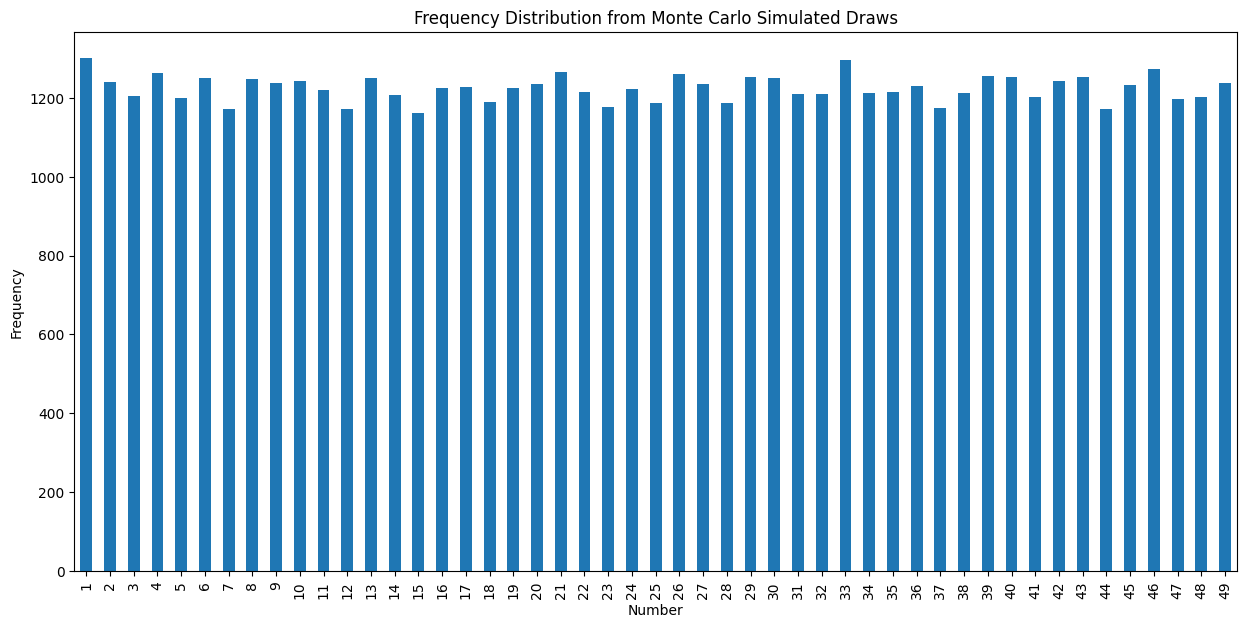

In [18]:
simulated_draws = [random.sample(possible_numbers, 6) for _ in range(10000)]
flattened_results = [num for draw in simulated_draws for num in draw]
frequency_distribution = pd.Series(flattened_results).value_counts().sort_index()
frequency_distribution.plot(kind='bar', figsize=(15,7))
plt.title('Frequency Distribution from Monte Carlo Simulated Draws')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()


In [19]:
top_n = 10  # or any other value you prefer
most_common_numbers = frequency_distribution.nlargest(top_n)
print(most_common_numbers)


1     1302
33    1296
46    1272
21    1265
4     1263
26    1261
39    1256
40    1254
43    1254
29    1252
dtype: int64


In [21]:
!pip install deap
from deap import base, creator, tools, algorithms
import random


In [22]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [23]:
toolbox = base.Toolbox()
toolbox.register("attr_number", random.randint, 1, 49)  # numbers from 1 to 49
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_number, n=6)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [24]:
def evaluate(individual):
    return sum(individual),  # Sum of the numbers in the individual

toolbox.register("evaluate", evaluate)


In [25]:
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=49, indpb=0.2)  # 20% chance per attribute to be mutated
toolbox.register("select", tools.selTournament, tournsize=3)


In [26]:
population = toolbox.population(n=300)  # e.g., 300 individuals in the population

NGEN = 40  # e.g., 40 generations
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

top10 = tools.selBest(population, k=10)


In [28]:
# Assuming you have a dictionary `number_frequencies` where keys are numbers and values are their frequencies
def evaluate(individual):
    return sum(number_frequencies[num] for num in individual),
